In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.fftpack import fft
import librosa
import librosa.display
import soundfile as sf

In [29]:
def load_audio(file_path):
    signal, sr = librosa.load(file_path, sr=None)
    return signal, sr

In [30]:
def plot_time_domain(signal, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [31]:
def plot_frequency_domain(signal, sr):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/sr)
    fft_magnitude = np.abs(fft(signal))[:len(freq)]

    plt.figure(figsize=(10, 4))
    plt.plot(freq, fft_magnitude)
    plt.title("Frequency-Domain Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

In [32]:
def butter_filter(signal, sr, filter_type, cutoff):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(4, normal_cutoff, btype=filter_type, analog=False)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

In [51]:
def add_noise(signal, noise_level=0.01):
    noise = np.random.normal(0, noise_level, len(signal))
    noisy_signal = signal + noise
    return noisy_signal

In [34]:
def apply_reverb(signal, sr, delay=0.2, decay=0.5):
    delay_samples = int(delay * sr)
    reverb_signal = np.copy(signal)
    for i in range(delay_samples, len(signal)):
        reverb_signal[i] += decay * signal[i - delay_samples]
    return reverb_signal

In [36]:
def save_audio(file_path, signal, sr):
    sf.write(file_path, signal, sr)

Enter the path to your audio file: /content/drive/MyDrive/The Pianothe Piano.mp3


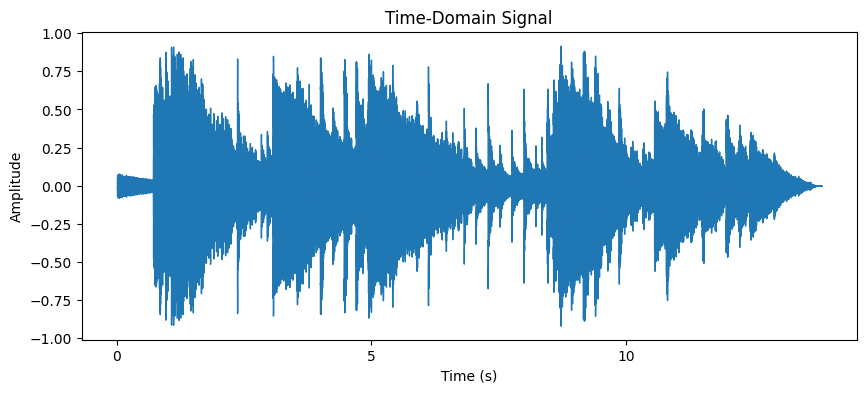

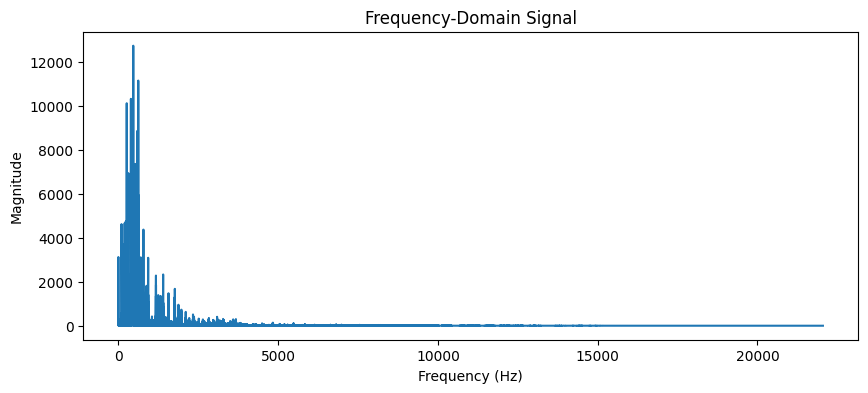

Choose a filter type:
1. Low-Pass
2. High-Pass
3. Band-Pass
Enter your choice (1/2/3): 3
Enter the low cutoff frequency (Hz): 400
Enter the high cutoff frequency (Hz): 1200


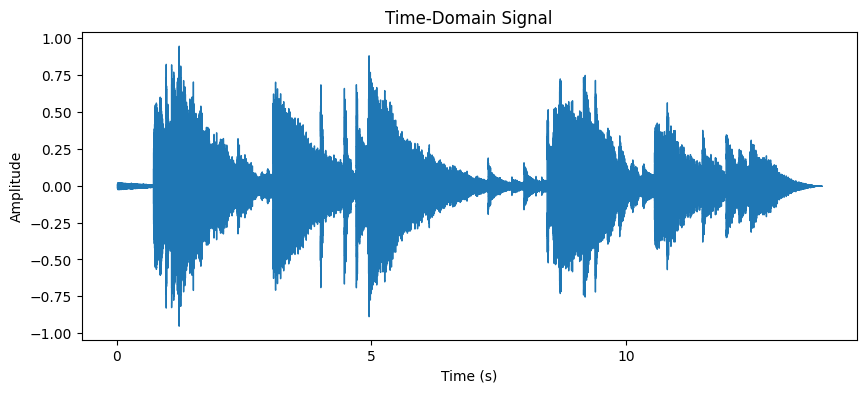

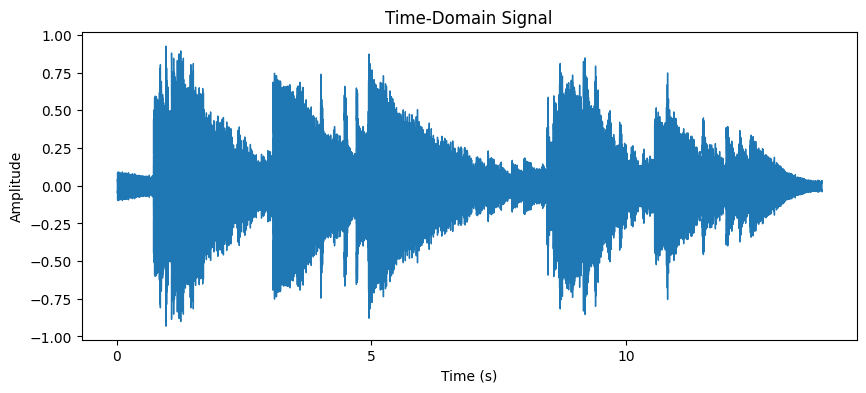

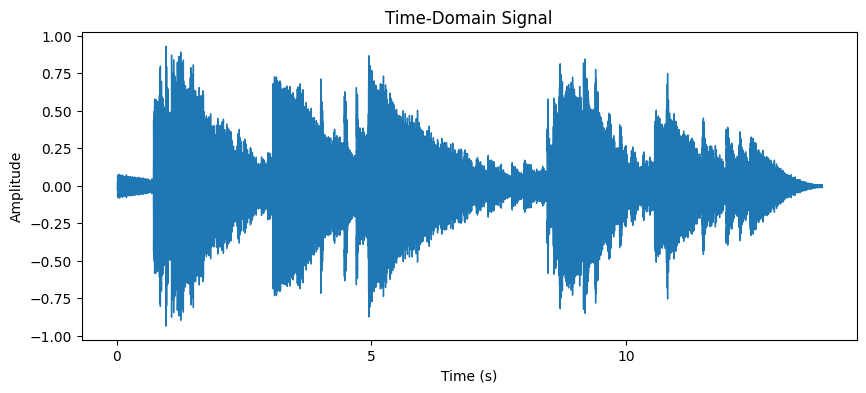

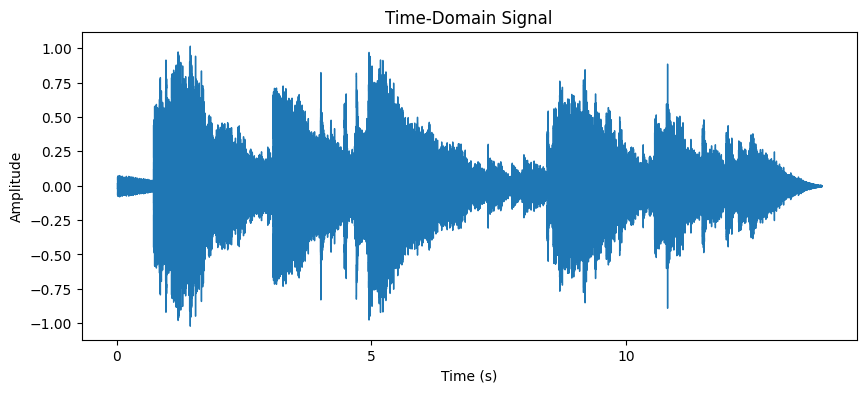

In [52]:
if __name__ == "__main__":

    file_path = input("Enter the path to your audio file: ")
    signal, sr = load_audio(file_path)


    plot_time_domain(signal, sr)


    plot_frequency_domain(signal, sr)


    print("Choose a filter type:\n1. Low-Pass\n2. High-Pass\n3. Band-Pass")
    filter_choice = int(input("Enter your choice (1/2/3): "))

    if filter_choice in [1, 2]:
        cutoff = float(input("Enter the cutoff frequency (Hz): "))
        filter_type = 'low' if filter_choice == 1 else 'high'
        filtered_signal = butter_filter(signal, sr, filter_type, cutoff)
        plot_time_domain(filtered_signal, sr)
    elif filter_choice == 3:
        low_cutoff = float(input("Enter the low cutoff frequency (Hz): "))
        high_cutoff = float(input("Enter the high cutoff frequency (Hz): "))
        signal = butter_filter(signal, sr, 'low', high_cutoff)
        filtered_signal = butter_filter(signal, sr, 'high', low_cutoff)
        plot_time_domain(filtered_signal, sr)


    noisy_signal = add_noise(signal)
    plot_time_domain(noisy_signal, sr)
    filtered_signal = butter_filter(noisy_signal, sr, 'low', 2000)
    plot_time_domain(filtered_signal, sr)


    reverb_signal = apply_reverb(signal, sr)
    plot_time_domain(reverb_signal, sr)

In [41]:
save_path = input("Enter the save path for the processed audio (e.g., output.wav): ")
save_audio(save_path, filtered_signal, sr)

print("Processing complete. File saved at:", save_path)

Enter the save path for the processed audio (e.g., output.wav): /content/drive/MyDrive/Cars/finalpeice.mp3
Processing complete. File saved at: /content/drive/MyDrive/Cars/finalpeice.mp3
